# Limits to Growth

In [12]:
import numpy
import pandas

from matplotlib import pyplot

%matplotlib inline
%config InlineBackend.figure_format = "retina"

import modsim

In [3]:
filename = "https://en.wikipedia.org/wiki/Estimates_of_historical_world_population"
table2 = pandas.read_html(
    filename,
    header=0,
    index_col=0,
    decimal='M',
)[2]

table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

un = table2.un / 1e9
census = table2.census / 1e9

t_0 = census.index[0]
t_end = census.index[-1]
elapsed_time = t_end - t_0

p_0 = census[t_0]
p_end = census[t_end]

total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time

In [7]:
def run_simulation(system, growth_func):
    results = modsim.TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in range(int(system.t_0), int(system.t_end)):
        growth = growth_func(t, results[t], system)
        results[t+1] = results[t] + growth
        
    return results

In [8]:
def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    modsim.decorate(xlabel='Year', 
             ylabel='World population (billion)') 

In [4]:
def growth_func_quad(t, pop, system):
    return system.alpha * pop + system.beta * pop**2

In [5]:
t_0 = census.index[0]
p_0 = census[t_0]
t_end = census.index[-1]

system = modsim.System(
    t_0=t_0,
    p_0=p_0,
    t_end=t_end,
)

In [6]:
system.alpha = 25 / 1000
system.beta = -1.8 / 1000

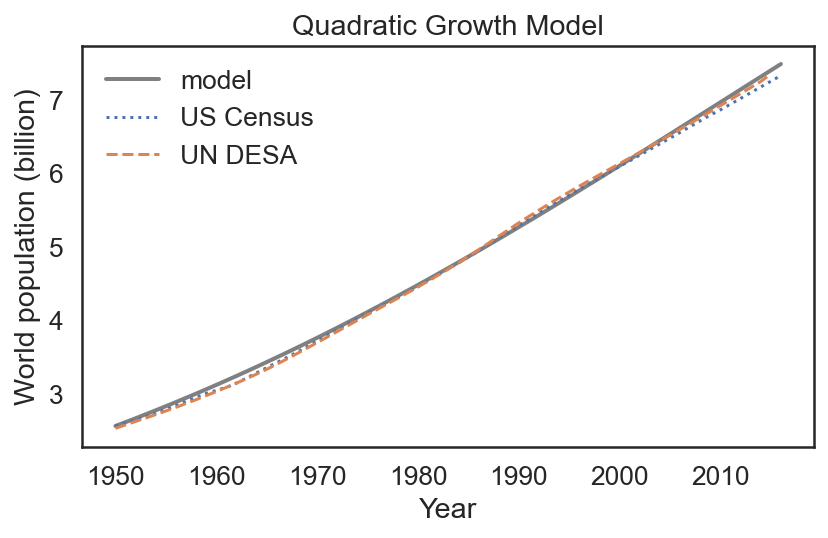

In [9]:
results = run_simulation(system, growth_func_quad)
results.plot(color='gray', label='model')
plot_estimates()
modsim.decorate(title='Quadratic Growth Model')

### Net Growth

In [10]:
pop_array = numpy.linspace(0, 15, 101) # from 0 to 15 billion

In [11]:
growth_array = (system.alpha * pop_array + 
                system.beta * pop_array**2)

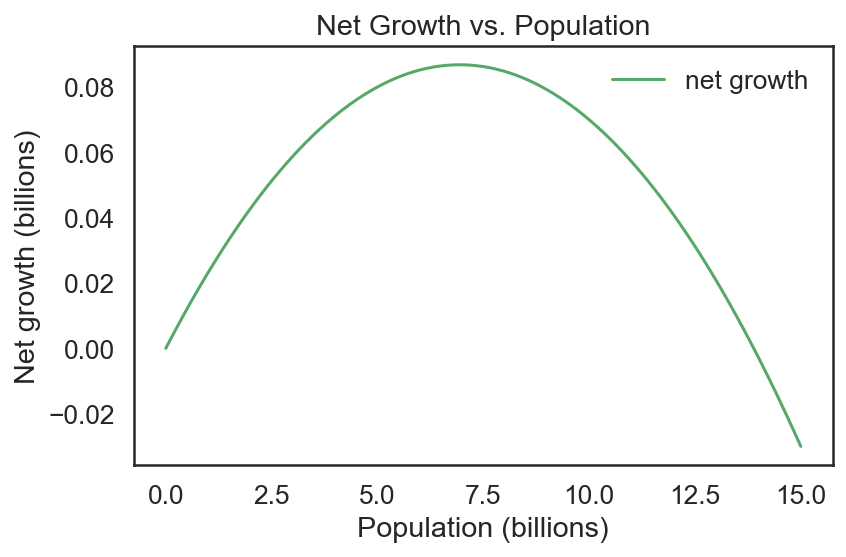

In [13]:
pyplot.plot(pop_array, growth_array, label='net growth', color='C2')

modsim.decorate(xlabel='Population (billions)',
         ylabel='Net growth (billions)',
         title='Net Growth vs. Population')

In [14]:
# Equilibrium
-system.alpha / system.beta

13.88888888888889

### Exercise 1

In a previous section, we saw a different way to parameterize the quadratic model:

$\Delta p = rp(1-p/K)$

where $r=\alpha$ and $K=-\alpha / \beta$.

Write a version of `growth_func` that implements this version of the model. Test it by computing the values of $r$ and $K$ that correspond to `alpha=0.025` and `beta=-0.0018`, and confirm that you get the same results.

In [22]:
system2 = modsim.System(
    t_0=t_0,
    p_0=p_0,
    t_end=t_end,
    r=0.025,
    K=0.025/0.0018,
)


In [15]:
def growth_func_quad2(t, pop, system):
    return system.r * pop * (1 - pop / system.K)

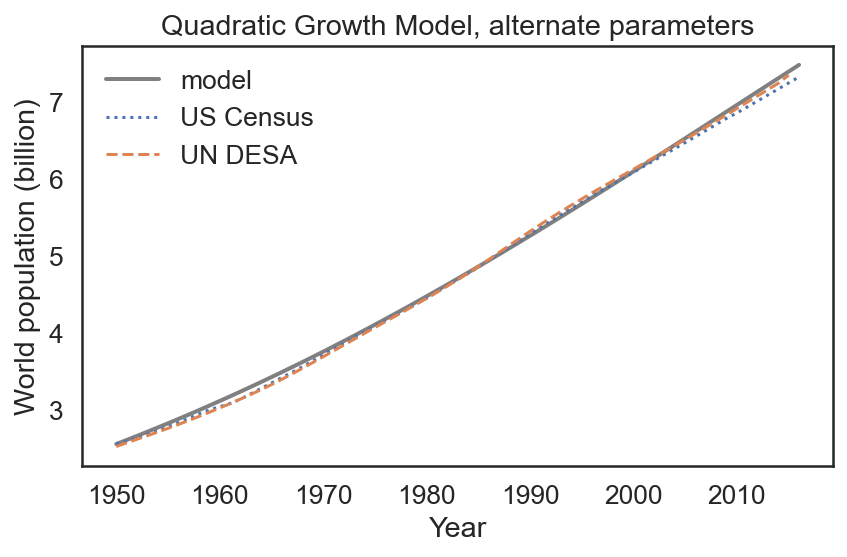

In [23]:
results2 = run_simulation(system2, growth_func_quad2)
results2.plot(color='gray', label='model')
plot_estimates()
modsim.decorate(title='Quadratic Growth Model, alternate parameters')

### Exercise 3

In [24]:
system3 = modsim.System(
    t_0=t_0,
    p_0=p_0,
    t_end=t_end,
    r=0.025,
    K=0.025/0.0018,
)

In [27]:
pop_array = numpy.linspace(1, 20, 20)
pop_array

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

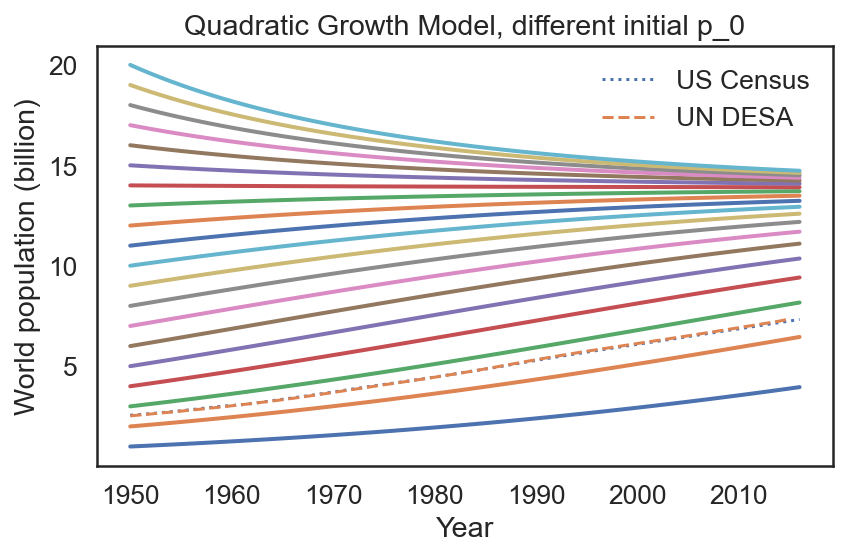

In [30]:
for p_0 in pop_array:
    system3.p_0 = p_0
    results3 = run_simulation(system3, growth_func_quad2)
    results3.plot(label="_nolegend")

plot_estimates()
modsim.decorate(title='Quadratic Growth Model, different initial p_0')